In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Load the dataset
df = pd.read_csv("/content/cardio_train (1).csv", sep=';')  # Semicolon separator

# Drop irrelevant columns if any (e.g., id)
df.drop(columns=['id'], inplace=True)

# Display basic info
print(df.head())
print(df.info())
print(df.describe())


     age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393       2     168    62.0    110     80            1     1      0   
1  20228       1     156    85.0    140     90            3     1      0   
2  18857       1     165    64.0    130     70            3     1      0   
3  17623       2     169    82.0    150    100            1     1      0   
4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 no

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Define X and y
X = df.drop('cardio', axis=1)
y = df['cardio']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


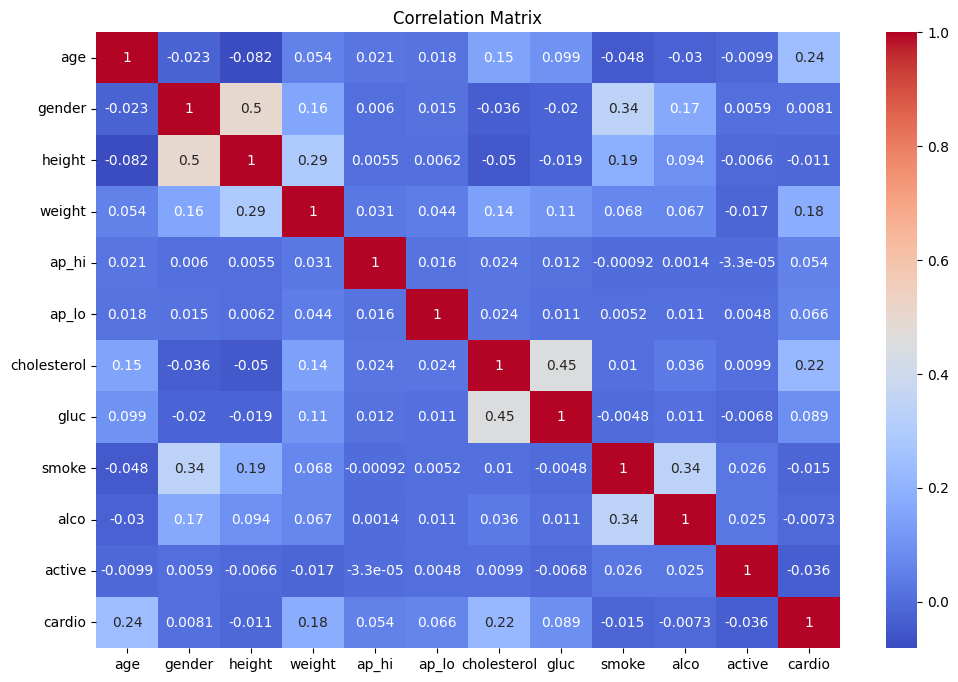

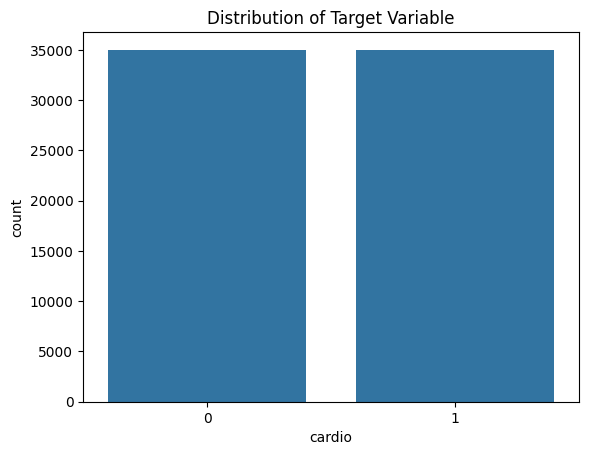

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Count plot of target
sns.countplot(x='cardio', data=df)
plt.title('Distribution of Target Variable')
plt.show()


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Logistic Regression Accuracy: 0.72
Confusion Matrix:
 [[5363 1625]
 [2244 4768]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.73      6988
           1       0.75      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000


K-Nearest Neighbors Accuracy: 0.65
Confusion Matrix:
 [[4620 2368]
 [2549 4463]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.66      0.65      6988
           1       0.65      0.64      0.64      7012

    accuracy                           0.65     14000
   macro avg       0.65      0.65      0.65     14000
weighted avg       0.65      0.65      0.65     14000


Support Vector Machine Accuracy: 0.73
Confusion Matrix:
 [[5321 1667]
 [2086 4926]]
Classification Report:
               precision  

In [ ]:
# Final model based on best accuracy
final_model = RandomForestClassifier()
final_model.fit(X_train, y_train)
final_preds = final_model.predict(X_test)

# Final Accuracy
print("Final Random Forest Accuracy:", accuracy_score(y_test, final_preds))


Final Random Forest Accuracy: 0.7124285714285714
